In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


In [8]:
df = pd.read_csv('SN_m_tot_V2.0.csv', sep=';', engine='python', header=None)
print(df.head())
print(df.shape)

      0  1         2      3    4  5  6
0  1749  1  1749.042   96.7 -1.0 -1  1
1  1749  2  1749.123  104.3 -1.0 -1  1
2  1749  3  1749.204  116.7 -1.0 -1  1
3  1749  4  1749.288   92.8 -1.0 -1  1
4  1749  5  1749.371  141.7 -1.0 -1  1
(3321, 7)


In [9]:
df.columns = ["Year", "Month", "DecimalYear", "SunspotNumber", "Std", "Observations", "Indicator"]
df = df[["Year", "Month", "SunspotNumber"]]
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df = df[['Date', 'SunspotNumber']]
print(df.head())

        Date  SunspotNumber
0 1749-01-01           96.7
1 1749-02-01          104.3
2 1749-03-01          116.7
3 1749-04-01           92.8
4 1749-05-01          141.7


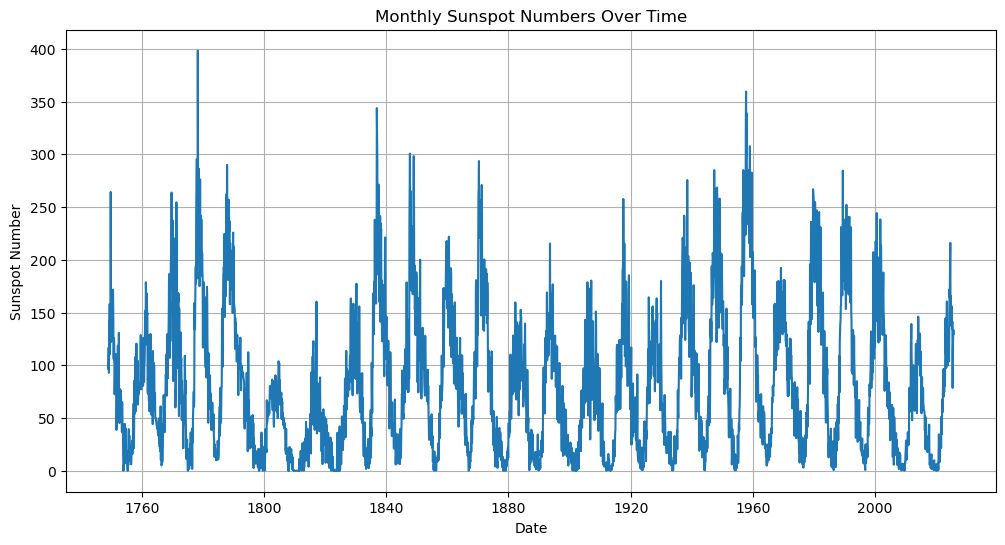

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["SunspotNumber"], label="Monthly Sunspot Number")
plt.title("Monthly Sunspot Numbers Over Time")
plt.xlabel("Date")
plt.ylabel("Sunspot Number")
plt.grid(True)
plt.show()

In [13]:
print(df["SunspotNumber"].describe())


count    3321.000000
mean       82.161427
std        67.667860
min         0.000000
25%        24.300000
50%        68.300000
75%       123.200000
max       398.200000
Name: SunspotNumber, dtype: float64


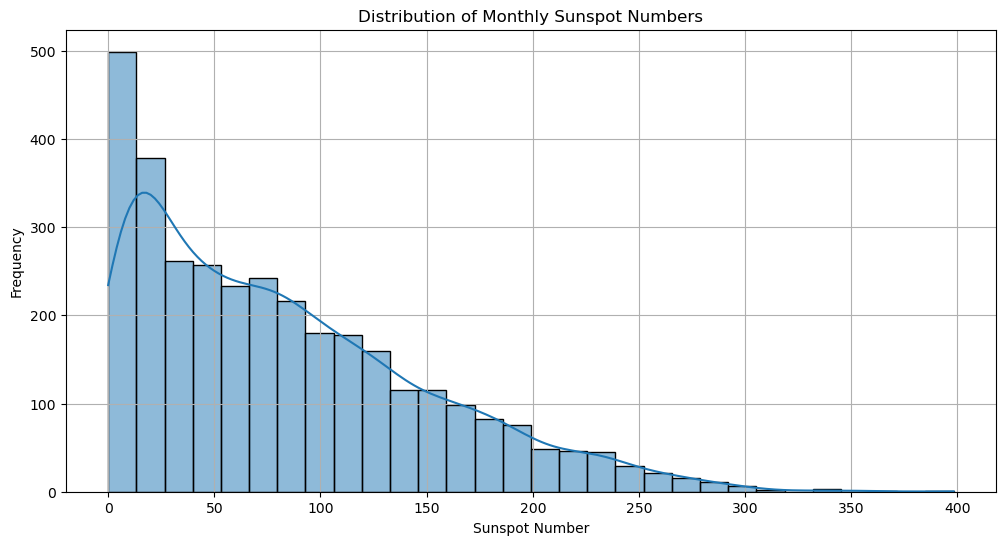

In [28]:
plt.figure(figsize=(12, 6))
sns.histplot(df["SunspotNumber"], bins=30, kde=True)
plt.title("Distribution of Monthly Sunspot Numbers")
plt.xlabel("Sunspot Number")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

positive skewed - đuôi dài về phía giá trị cao
Không theo normal distribution - sunspot bị ảnh hưởng bởi tính stochastic trong dynamo sun -> distributon asymmetrical


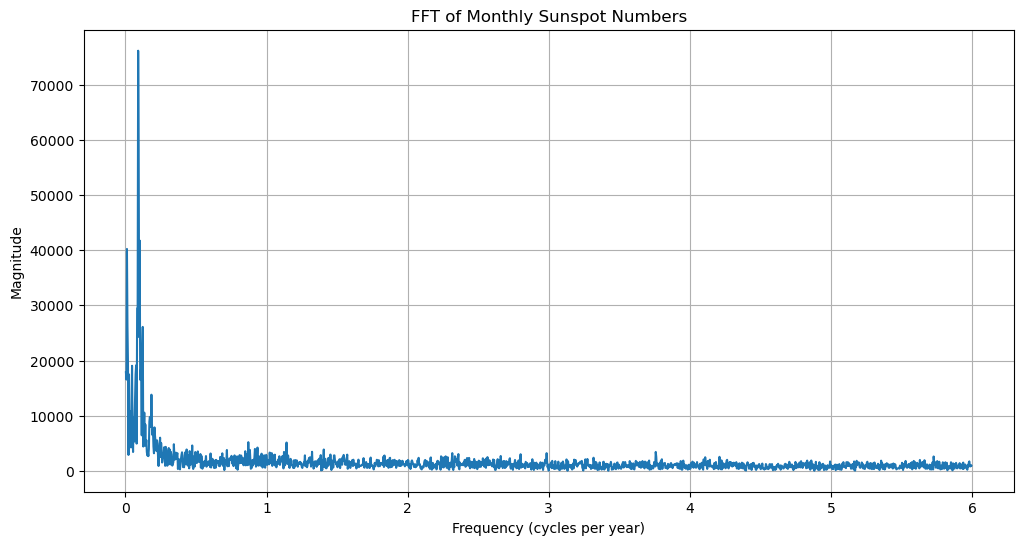

In [20]:
y = df["SunspotNumber"].values
Y = np.fft.fft(y)
freq = np.fft.fftfreq(len(y), d=1/12)

plt.figure(figsize=(12, 6))
plt.plot(freq[1:len(freq)//2], np.abs(Y)[1:len(Y)//2])
plt.title("FFT of Monthly Sunspot Numbers")
plt.xlabel("Frequency (cycles per year)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

Trục hoành: chu kỳ mỗi năm
loại bỏ giá trị f=0 giúp không bị chi phối
Trục tung: biên độ 
Tần số đỉnh nằm ở vị trí 0.09 cycles/year
Chu kỳ: 1/0.09 = 11,11 years/cycle
-> xác thực chu lỳ vết đen mặt trời 11 năm

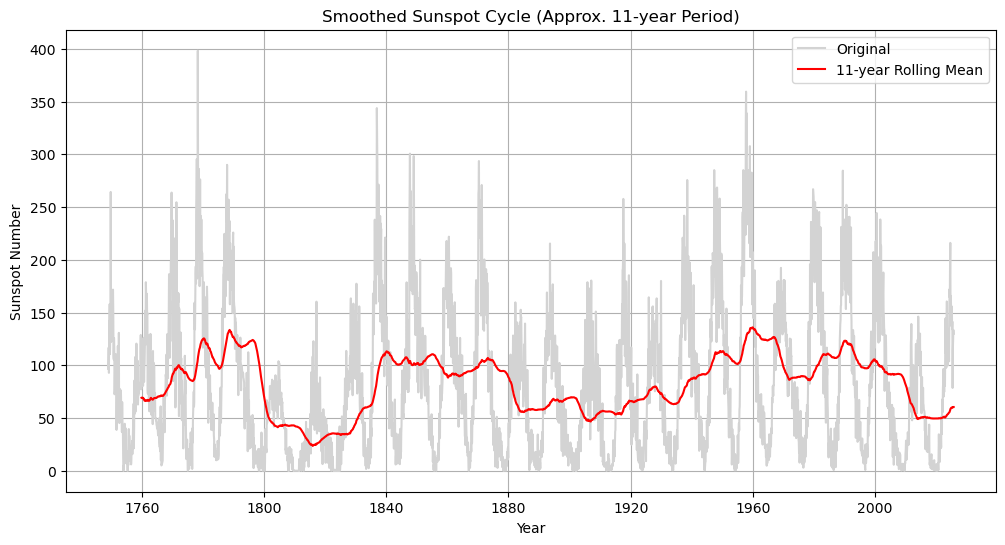

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['SunspotNumber'], color='lightgray', label='Original')
plt.plot(df['Date'], df["SunspotNumber"].rolling(window=132).mean(), color='red', label='11-year Rolling Mean')
plt.title("Smoothed Sunspot Cycle (Approx. 11-year Period)")
plt.xlabel("Year")
plt.ylabel("Sunspot Number")
plt.legend()
plt.grid(True)
plt.show()

có tính chu kì 
Đỉnh: thời điểm Sun hoạt động mạnh nhất trong chu 
cường độ thay đổi theo thời gian
Dalton Minimum: 1790-1840
Khoảng cách đường xám đỏ: mức độ biến động hàng tháng
đường màu xám biến thiên mạnh -> phản ánh tính ngẫu nhiên stochastic

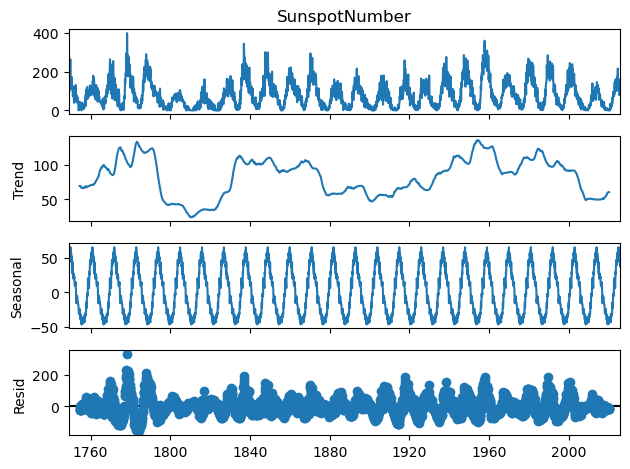

In [26]:
result = seasonal_decompose(df.set_index("Date")["SunspotNumber"], model="additive", period=132)
result.plot()
plt.show()


Biên độ không đều, bất đối xứng, biến động cao, stationary yếu - trend dài hạn, autocorrelation mạnh ở lag ~ 11 năm, ảnh hưởng bởi dynamo mặt trời -> chaos deterministic (Lyapunov exponent dương)
Không có trend tuyến tính rõ, biến đổi chậm
Dao động lặp biên 50-100, hình sin-like nhưng bất đối xứng -> dao động đều đặn, gần periodic nhưng biên độ thực tế biến thiên theo chu kỳ Hale (~22 năm đảo cực từ), không có seasonal ngắn hạn
Phần còn lại sau khi trừ trend + seasonal, 

Sunspot number từ SIDC từ 1749-2025 với khoảng 3300 điểm dữ liệu
Chu kì non-linear + noise chaotic -> khai thác superposition/entanglement, Skew distribution và tail nặng -> high dimensional, dataset nhỏ phù hợp simulator nhưng challenge ở hard ware, 

In [29]:
output_path = "processed_sunspot_data.csv"
df.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}")

Processed data saved to processed_sunspot_data.csv
